In [4]:
# Cell 1 - Imports + create folder
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix

# create result folder
os.makedirs('eda_results', exist_ok=True)
print("Ready.eda_results folder created (if not already).")    

Ready.eda_results folder created (if not already).


In [6]:
# Cell 2 - Load dataset
path = r'4) house Prediction Data Set.csv'
df = pd.read_csv(path)
print("Shape:", df.shape)
df.head()

Shape: (732, 15)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [7]:
# Cell 3 - Show columns and types
print("Columns:")
display(df.columns.tolist())
print("\nData types:")
display(df.dtypes)

Columns:


['Unnamed: 0.1',
 'Unnamed: 0',
 'Text',
 'Sentiment',
 'Timestamp',
 'User',
 'Platform',
 'Hashtags',
 'Retweets',
 'Likes',
 'Country',
 'Year',
 'Month',
 'Day',
 'Hour']


Data types:


Unnamed: 0.1     int64
Unnamed: 0       int64
Text            object
Sentiment       object
Timestamp       object
User            object
Platform        object
Hashtags        object
Retweets         int64
Likes            int64
Country         object
Year             int64
Month            int64
Day              int64
Hour             int64
dtype: object

In [8]:
# Cell 4 - Missing Values Check
mv = df.isnull().sum().sort_values(ascending=False)
display(mv)

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [12]:
# Cell 5 — Numeric summary stats
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)

summary = df[num_cols].agg(['mean', 'median', 'std']).T
summary['mode'] = [df[c].mode().iloc[0] if not df[c].mode().empty else np.nan for c in num_cols]
summary['count_nonnull'] = df[num_cols].count().values
display(summary)

# save summary csv
summary.to_csv('eda_results/summary_stats.csv')
print("Saved -> eda_results/summary_stats.csv")

Numeric columns: ['Unnamed: 0.1', 'Unnamed: 0', 'Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour']


,mean,median,std,mode,count_nonnull
Unnamed: 0.1,366.464481,366.5,211.513936,0,732
Unnamed: 0,369.740437,370.5,212.428936,0,732
Retweets,21.508197,22.0,7.061286,22,732
Likes,42.901639,43.0,14.089848,45,732
Year,2020.471311,2021.0,2.802285,2023,732
Month,6.122951,6.0,3.411763,2,732
Day,15.497268,15.0,8.474553,15,732
Hour,15.521858,16.0,4.113414,14,732


Saved -> eda_results/summary_stats.csv


In [16]:
# Cell 6 — Find identical columns (duplicate detection)
dupes = []
cols = df.columns.tolist()
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        try:
            if df[cols[i]].equals(df[cols[j]]):
                dupes.append((cols[i], cols[j]))
        except Exception:
            pass
print("Idential column pairs (if ant):")
display(dupes)

Idential column pairs (if ant):


[]

In [18]:
# Cell 7 - Prepare for plotting (fill numeric NaNs temporarily)
df_vis = df.copy()
num_cols = df_vis.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    if  df_vis[c].isnull().any():
        df_vis[c] = df_vis[c].fillna(df_vis[c].median())
display(df_vis[num_cols].isnull().sum())

# zeros (no missing in numeric columns after fill). This is only for plotting safety.

Unnamed: 0.1    0
Unnamed: 0      0
Retweets        0
Likes           0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

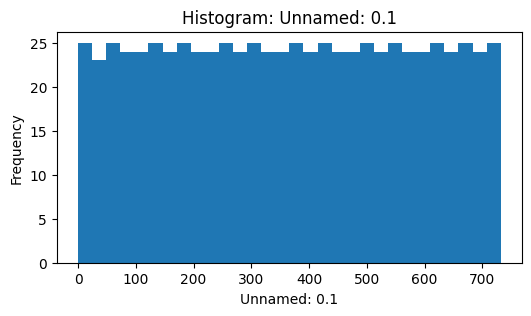

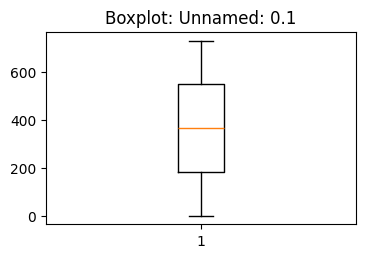

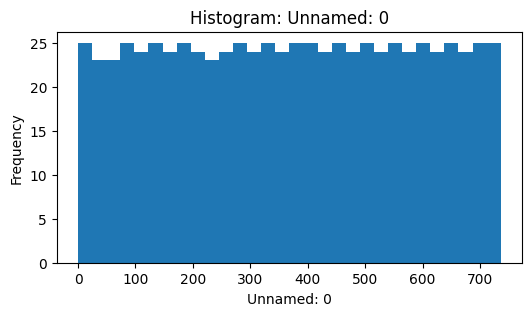

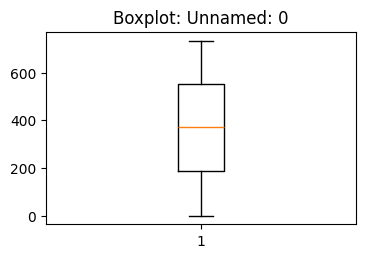

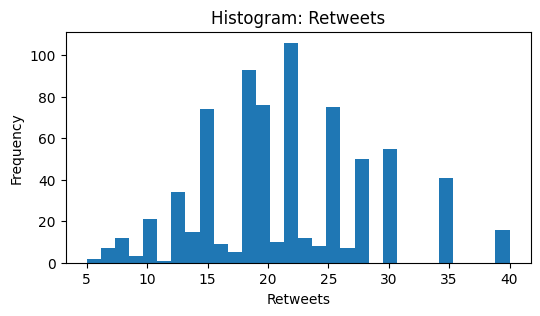

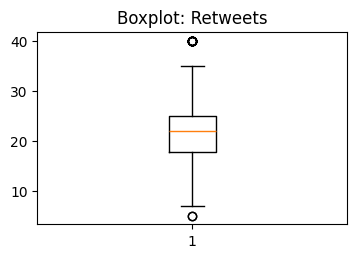

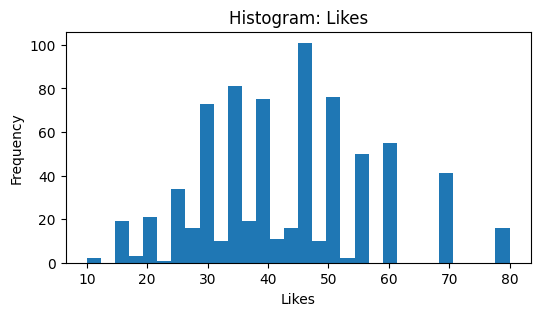

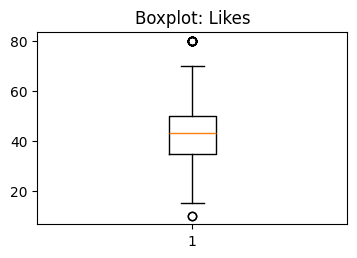

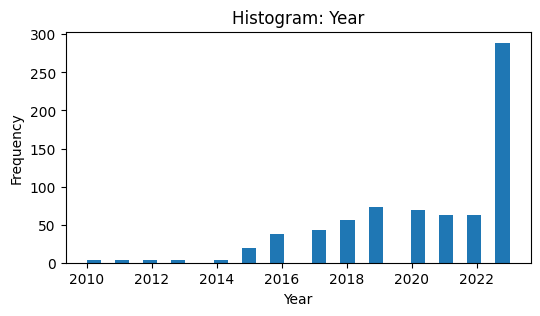

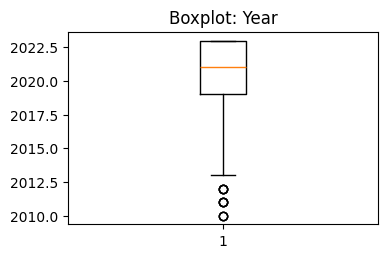

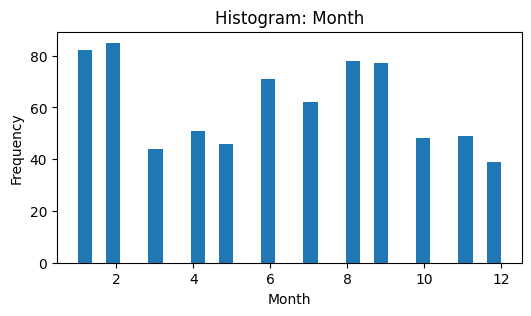

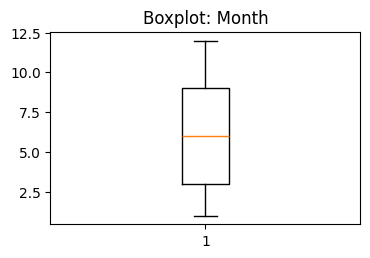

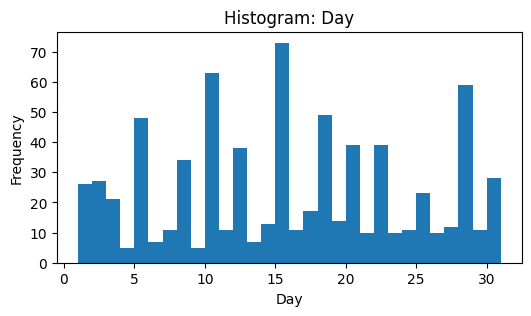

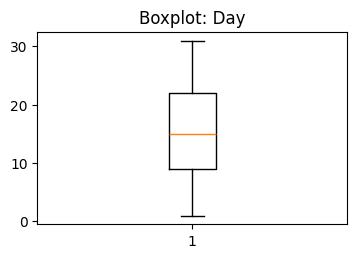

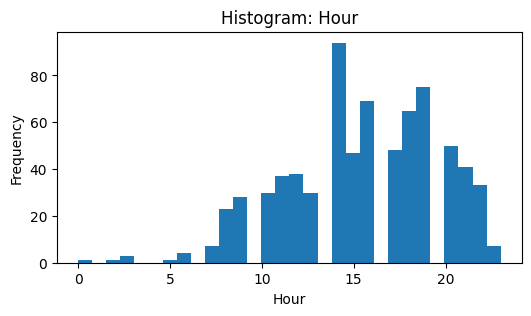

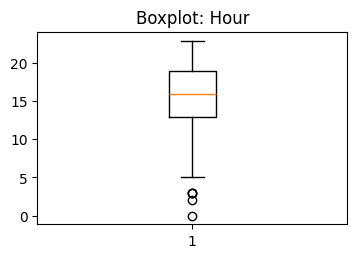

In [19]:
# Cell 8 - Histograms + Boxplots (visuals)
for c in num_cols:
    plt.figure(figsize=(6,3))
    plt.hist(df_vis[c].dropna(),bins=30)
    plt.title('Histogram: ' + c)
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(4,2.5))
    plt.boxplot(df_vis[c].dropna())
    plt.title('Boxplot: ' + c)
    plt.show()
    

In [22]:
# Cell 9 - Correlation + top correlated pairs
corr = df_vis[num_cols].corr()
display(corr)

corr_pairs = corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(bool))
top_pairs = corr_pairs.stack().sort_values(ascending=False).head(10)
print("Top correlated pairs (absolute):")
display(top_pairs)

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
Unnamed: 0.1,1.000000,0.999995,0.388637,0.376208,0.101578,0.443013,-0.080101,0.322371
Unnamed: 0,0.999995,1.000000,0.388884,0.376472,0.100749,0.443523,-0.080480,0.322163
Retweets,0.388637,0.388884,1.000000,0.998482,-0.039982,0.073265,0.009213,0.196955
Likes,0.376208,0.376472,0.998482,1.000000,-0.043415,0.066643,0.011489,0.195331
Year,0.101578,0.100749,-0.039982,-0.043415,1.000000,-0.314845,0.021973,-0.087470
Month,0.443013,0.443523,0.073265,0.066643,-0.314845,1.000000,-0.135873,0.137835
Day,-0.080101,-0.080480,0.009213,0.011489,0.021973,-0.135873,1.000000,0.044072
Hour,0.322371,0.322163,0.196955,0.195331,-0.087470,0.137835,0.044072,1.000000


Top correlated pairs (absolute):


Unnamed: 0.1  Unnamed: 0    0.999995
Retweets      Likes         0.998482
Unnamed: 0    Month         0.443523
Unnamed: 0.1  Month         0.443013
Unnamed: 0    Retweets      0.388884
Unnamed: 0.1  Retweets      0.388637
Unnamed: 0    Likes         0.376472
Unnamed: 0.1  Likes         0.376208
              Hour          0.322371
Unnamed: 0    Hour          0.322163
dtype: float64

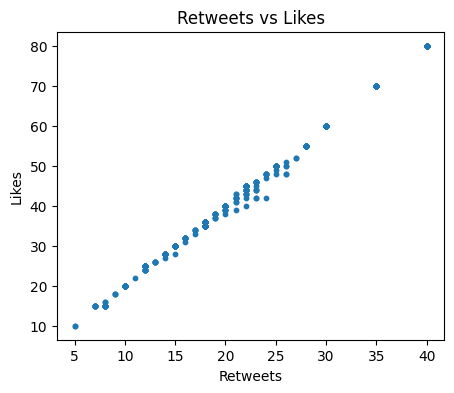

In [23]:
# Cell 10 - Scatter plot for Retweets vs Likes (visual check)
if 'Retweets' in df_vis.columns and 'Likes' in df_vis.columns:
    plt.figure(figsize=(5,4))
    plt.scatter(df_vis['Retweets'], df_vis['Likes'], s=10)
    plt.xlabel('Retweets'); plt.ylabel('Likes')
    plt.title('Retweets vs Likes')
    plt.show()
else:
    print("Retweets bs Likes not present.")

In [24]:
# Cell 11 - Save cleaned CSV & finish
df.to_csv('eda_results/house_data_cleaned.csv',  index=False)
print("Saved cleaned -> eda_results/house_data_cleaned.csv")
print("Saved summary -> eda_results/house_data_cleaned.csv")

Saved cleaned -> eda_results/house_data_cleaned.csv
Saved summary -> eda_results/house_data_cleaned.csv
